# Chapter 5. Statistics

Statistics refers to the mathematics and techniques with which we understand data.

In [45]:
from __future__ import division
from collections import Counter
import math
import matplotlib.pyplot as plt

# https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Importing%20Notebooks.html
# These functions are from Chapter 4
def dot(v, w):
    """ v_1 * w_1 + ... + v_n * w_n """
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """ v_1 * v_1 + ... + v_n * v_n """
    return dot(v, v)

## Describing a Single Set of Data

Getting back to the Data-Sciencester example from Chapter 1, let's use statistics to distill and communicate relevant features of our data.

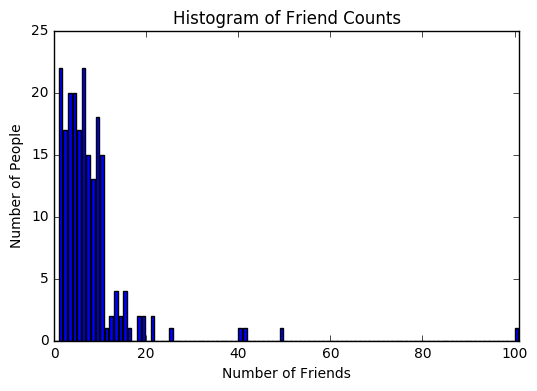

In [46]:
# put the friend counts into a histogram using Counter and plt.bar()

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,
               7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,
               2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)
xs = range(101)  # largest value is 100 
ys = [friend_counts[x] for x in xs]  # height is the number of friends 
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of Friends")
plt.ylabel("Number of People")
plt.show()

Nice chart, but not very useful for an elevator pitch.  
Let's start generating some statistics:

In [47]:
# Probably the simplest statistic is the number of data points
num_points = len(num_friends)
num_points

204

In [48]:
# Let's throw in the largest and smallest values:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)
print
# which are just special cases of wanting to know the values in specific positions:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
print(smallest_value)
second_smallest_value = sorted_values[1]
print(second_smallest_value)
second_largest_value = sorted_values[-2]
print(second_largest_value)

100
1

1
1
49


## Central Tendencies

We want some notion of where our data is centered.  
One common measure is mean (average), which is the sum of the data divided by its count:

In [49]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

The median is the middle-most value if the number of data points is odd, or the average of the 2 middle-most values if the number of data points is even.

In [50]:
def median(v):
    """ finds the 'middle-most' value of v """
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

Even though mean is easier to compute, it is also more sensitive to outliers (like one person having 100 friends).

A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies.

In [51]:
def quantile(x, p):
    """ returns the pth-percentile value in x """
    p_index = int(p * len(x))
    return sorted(x)[p_index]
 
print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.50))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

1
3
6
9
13


Mode is the most common value occurring in the data.

In [52]:
def mode(x):
    """ returns a list, might be more than one mode value """
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems() if count == max_count]  # if there is more than one mode

mode(num_friends)

[1, 6]

Mean is the central tendency metric we will use the most.

## Dispersion

Dispersion refers to measures of how spread out our data is.